<a href="https://colab.research.google.com/github/YAsH12377777/YAsHDEEP/blob/main/YAsHDEEP_G_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transactions DataFrame columns:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Merged DataFrame:
  customer_id      CustomerName         Region  SignupDate TransactionID  \
0       C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1       C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2       C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3       C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4       C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  CustomerID ProductID      TransactionDate  Quantity  TotalValue   Price  
0      C0001      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      C0001      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      C0001      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      C0001      P083  2024-05-07 03:11:44         2 

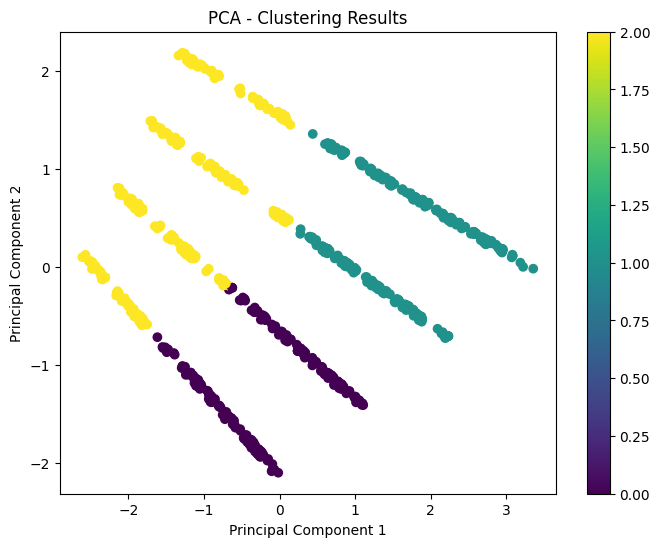

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Load data
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")
# Preprocessing
customers_df.dropna(inplace=True)
transactions_df.dropna(inplace=True)
print("Transactions DataFrame columns:")
print(transactions_df.columns)
customers_df.rename(columns={"CustomerID": "customer_id"}, inplace=True)
merged_df = pd.merge(customers_df, transactions_df, left_on="customer_id", right_on="CustomerID")
print("Merged DataFrame:")
print(merged_df.head())
features = merged_df.drop(columns=['customer_id', 'CustomerID'])

# Identify numerical and categorical columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Preprocessing pipeline: Handle missing values, scaling for numerical data, encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing data in numerical columns
            ('scaler', StandardScaler())  # Scale numerical columns
]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical data
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
        ]), categorical_cols)
    ])
pipeline = Pipeline([
    ('preprocessing', preprocessor),  # Preprocessing steps
    ('pca', PCA(n_components=2)),  # PCA for dimensionality reduction
    ('kmeans', KMeans(n_clusters=3))  # KMeans clustering with 3 clusters
])
pipeline.fit(features)
pca_features = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessing'].transform(features))
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Evaluate the clustering
sil_score = silhouette_score(pca_features, cluster_labels)
db_score = davies_bouldin_score(pca_features, cluster_labels)

# Print the clustering evaluation scores
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {db_score}")
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA - Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()